# Classification model using Logistic Regression

### 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload RNA data

In [4]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_203_genes_74_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,AKT1,ANXA1,ANXA2,APAF1,APC,ARID1A,ATM,AXIN2,BAP1,...,SOD2,SRC,STK11,TGM2,TP53,TSC1,TSC2,VEGFA,VHL,Y
0,0,34.434275,33.868001,37.396638,32.668769,32.860903,33.848026,35.942429,31.470999,33.677294,...,38.67433,32.25286,34.96649,38.50142,33.83518,32.93402,34.93520,37.79678,32.30615,1
1,1,34.152701,35.085434,36.570671,32.337493,33.717568,33.843513,35.988225,29.614297,32.643149,...,38.64559,31.28699,33.69034,34.33752,34.44810,33.16630,35.08304,40.09193,32.19988,1
2,2,35.449119,34.908372,38.443020,31.818198,34.023099,33.516005,36.193587,30.304642,32.368866,...,40.50559,32.18447,33.52524,35.50178,35.41980,33.63282,34.79244,38.22308,31.49147,1
3,3,34.220278,36.290124,37.244829,32.601293,33.507711,34.197698,36.578348,29.398240,31.895400,...,38.99231,30.26144,33.20234,35.77236,34.18862,32.88250,35.02014,39.94908,32.11538,0
4,4,33.973368,36.863272,36.871693,33.593121,34.607163,33.351460,36.807497,29.939456,33.968348,...,38.41437,33.05053,34.14981,33.47112,34.91241,33.44515,35.01310,39.31564,33.33646,1


In [5]:
X = data.iloc[:,1:75  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          AKT1      ANXA1      ANXA2      APAF1        APC     ARID1A  \
0    34.434275  33.868001  37.396638  32.668769  32.860903  33.848026   
1    34.152701  35.085434  36.570671  32.337493  33.717568  33.843513   
2    35.449119  34.908372  38.443020  31.818198  34.023099  33.516005   
3    34.220278  36.290124  37.244829  32.601293  33.507711  34.197698   
4    33.973368  36.863272  36.871693  33.593121  34.607163  33.351460   
..         ...        ...        ...        ...        ...        ...   
176  35.057571  35.985233  37.436964  32.603769  33.811200  34.133940   
177  32.553513  37.586062  37.635004  33.619701  32.786808  32.373330   
178  34.807825  36.111194  37.953757  33.316811  33.632929  34.118843   
179  34.787403  35.120811  35.957212  33.046782  34.048901  33.833796   
180  34.983826  34.648929  38.196845  32.170042  33.143095  33.739764   

           ATM      AXIN2       BAP1     CARD11  ...    SLC2A1      SOD2  \
0    35.942429  31.470999  33.677294  30.617112

### 3. Train-Test dataset split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_test))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [7]:
param_grid = {'C': [1,2,5,7,10],
            'solver': ['newton-cg','liblinear'], 
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

c:\Users\sandr\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\sandr\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125],
                         'solver': ['newton-cg', 'liblinear']})

In [8]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


c:\Users\sandr\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(C=1, max_iter=25, random_state=125, solver='newton-cg')

In [9]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5280788177339902


### 5. Prediction

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [12]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset: 0.8888888888888888
Final accuracy on the testing dataset: 0.4864864864864865


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[58 10]
 [ 6 70]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1]


In [14]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        68
           1       0.88      0.92      0.90        76

    accuracy                           0.89       144
   macro avg       0.89      0.89      0.89       144
weighted avg       0.89      0.89      0.89       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 8 12]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0]


In [16]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.43      0.35      0.39        17
           1       0.52      0.60      0.56        20

    accuracy                           0.49        37
   macro avg       0.48      0.48      0.47        37
weighted avg       0.48      0.49      0.48        37



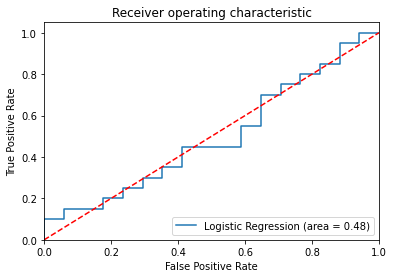

In [17]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()